<a href="https://colab.research.google.com/github/Anushka091922/Quantum-Inspired-Indexing-Algorithm/blob/main/Copy_of_Quantum_Encoding_FYP_Final_Implementation_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Securely load and verify API keys stored in a .env file using












In [ ]:
# Creating the .env file with the required environment variables
with open(".env", "w") as file:
    file.write("""
LANGCHAIN_TRACING_V2=true
LANGCHAIN_ENDPOINT=https://api.smith.langchain.com
LANGCHAIN_PROJECT=advanced-rag
LANGCHAIN_API_KEY=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
GROQ_API_KEY=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
""")


In [ ]:
# Install python-dotenv
!pip install python-dotenv

# Import necessary modules
from dotenv import load_dotenv

# Load the .env file
load_dotenv(".env")

# Set environment variables
import os
os.environ['LANGCHAIN_TRACING_V2'] = os.getenv("LANGCHAIN_TRACING_V2")
os.environ['LANGCHAIN_ENDPOINT'] = os.getenv("LANGCHAIN_ENDPOINT")
os.environ['LANGCHAIN_PROJECT'] = os.getenv("LANGCHAIN_PROJECT")
os.environ['LANGCHAIN_API_KEY'] = os.getenv("LANGCHAIN_API_KEY")
os.environ['GROQ_API_KEY'] = os.getenv("GROQ_API_KEY")


In [ ]:
# Check if environment variables are set
print(os.getenv("LANGCHAIN_API_KEY"))
print(os.getenv("GROQ_API_KEY"))


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
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


In [ ]:
# Read and check the contents of the .env file
with open(".env", "r") as file:
    print(file.read())  # This will print the content of the .env file to verify it



LANGCHAIN_TRACING_V2=true
LANGCHAIN_ENDPOINT=https://api.smith.langchain.com
LANGCHAIN_PROJECT=advanced-rag
LANGCHAIN_API_KEY=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
GROQ_API_KEY=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



In [ ]:
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv())

True

In [ ]:
import os
os.environ['LANGCHAIN_TRACING_V2'] = 'true'
os.environ['LANGCHAIN_ENDPOINT'] = 'https://api.smith.langchain.com'
os.environ['LANGCHAIN_PROJECT'] = 'advanced-rag'
os.environ['LANGCHAIN_API_KEY'] = os.getenv("LANGCHAIN_API_KEY")
os.environ['GROQ_API_KEY'] = os.getenv("GROQ_API_KEY")

#Retrieve DuckDuckGo search results using requests, parse them with BeautifulSoup, and save the data to a CSV file.

In [ ]:
!pip install langchain_community
!pip install langchain_groq
!pip install faiss-cpu
!pip install transformers

!pip install requests beautifulsoup4 googlesearch-python pandas
!pip install requests beautifulsoup4 pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.6/129.6 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 14.9 MB/s eta 0:00:00


In [ ]:
def fetch_duckduckgo_results(query):
    url = f"https://duckduckgo.com/html/?q={query}"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"}
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    results = []
    for a in soup.find_all('a', class_='result__a'):
        link = a['href']
        results.append(link)
    return results


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd  # Ensure pandas is imported
import re

def fetch_duckduckgo_results(query, num_results=100):  # Set num_results to 100
    url = f"https://duckduckgo.com/html/?q={query}"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"}
    results = []

    while len(results) < num_results:
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')

        # Loop through the search result links
        for a in soup.find_all('a', class_='result__a'):
            link = a['href']
            content = fetch_page_content(link)
            results.append((link, content))
            if len(results) >= num_results:
                break

        # Look for the next page of results
        next_page = soup.find('a', class_='result--more__btn')
        if next_page:
            url = f"https://duckduckgo.com{next_page['href']}"
        else:
            break

    return results[:num_results]

def fetch_page_content(url):
    try:
        # Send a request to fetch the content of the result page
        response = requests.get(url)
        if response.status_code == 200:
            page_soup = BeautifulSoup(response.text, 'html.parser')
            # Extract the main content of the page (adjust this as necessary)
            content = page_soup.get_text(strip=True)
            return content
        else:
            return f"Failed to retrieve content from {url}. Status code: {response.status_code}"
    except Exception as e:
        return f"Error fetching content: {str(e)}"

def save_to_csv(data, filename):
    # Save data into a CSV file
    df = pd.DataFrame(data, columns=['URL', 'Content'])
    df.to_csv(filename, index=False)  # Save as .csv file

# Main program to fetch results
query = input("Enter the search query: ")

# Sanitize query to use as a filename (remove spaces and special characters)
sanitized_query = re.sub(r'[^a-zA-Z0-9]', '_', query)  #here we are Replacing non-alphanumeric characters with '_'
filename = f"{sanitized_query}__100.csv"  # Dynamically create filename for 100 results

results = fetch_duckduckgo_results(query, num_results=100)  # Fetch 100 results

if not results:
    print("No results found!")
else:
    # Saving the results to a CSV file
    save_to_csv(results, filename)
    print(f"Results saved to '{filename}'")

    # Optionally, print the results to check
    for idx, (url, content) in enumerate(results, start=1):
        print(f"\nResult {idx}: {url}")

        # Split content into lines and print the first 1500 lines
        lines = content.splitlines()  # Split content by lines
        first_lines = "\n".join(lines[:2500])  # Get the first 1500 lines
        print(f"Content (first 1500 lines):\n{first_lines}...")

Enter the search query: maximum speed a jaguar can reach
Results saved to 'maximum_speed_a_jaguar_can_reach__100.csv'

Result 1: https://zooologist.com/how-fast-can-a-jaguar-run/
Content (first 1500 lines):
How Fast Can A Jaguar Run - Jaguar Speed - ZooologistAtoZAmphibiansBirdsFishInsectsMammalsPetsReptilesFeaturedHow Fast Can A Jaguar Run – Jaguar SpeedJaguarsare one of the most fascinating and powerful animals in the world. These big cats are known for their sleek, muscular bodies and their ability to run at incredible speeds. Their powerful legs, agility, and streamlined bodies make them one of the fastest big cats in the world.But justhow fast can a jaguar run?How fast can a jaguar runThe answer is thatjaguars are incredibly fast animals. In fact, they can reach speeds of up to80 kilometers per hour(50 miles per hour)when they are running at theirtop speed. This is an impressive feat, especially when you consider the fact that jaguars are large animals that canweigh up to 100 kilo

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import time
from langchain.prompts import ChatPromptTemplate
from langchain_groq import ChatGroq
from langchain_core.output_parsers import StrOutputParser

# Decomposition Chain Setup
template = """You are a helpful assistant that generates diverse sub-questions by exploring ALL possible interpretations of an input question.

**CRITICAL INSTRUCTION**: Before generating any queries, you MUST first identify every possible meaning and context for key terms in the question.

**Step-by-step process:**
1. **Identify ambiguous/multi-meaning terms** in the input question
2. **List ALL possible interpretations** for each ambiguous term
3. **Consider different domains** where this question could apply (technology, biology, economics, social sciences, etc.)
4. **Generate queries that span DIFFERENT interpretations** - do not focus on just one meaning

**For the question: {question}**

**Before generating queries, explicitly consider:**
- What are ALL the different meanings of each key word?
- What different fields or contexts could this apply to?
- What different types of "evolution" and "spread" exist?
- Are there technical, biological, social, economic, or other interpretations?

**Generate exactly 7 search queries that cover DIFFERENT interpretations and contexts:**
- At least 2-3 queries should address completely different meanings of key terms
- Each query should explore a distinct domain or interpretation
- Avoid generating multiple queries about the same interpretation
- Cover both common and less obvious meanings

**Example of good diversity:**
If the question contains "virus", generate queries covering:
- Biological viruses (medical/health context)
- Computer viruses (cybersecurity context)
- Viral content (social media context)
- Economic/social contagion (metaphorical context)

**Output format:** Plain queries separated by newlines (NO numbering, quotes, or markdown formatting)"""
prompt_decomposition = ChatPromptTemplate.from_template(template)

# Updated to use Llama3 70B production model
llm = ChatGroq(temperature=0, model="llama3-70b-8192")
generate_queries_decomposition = (
    prompt_decomposition
    | llm
    | StrOutputParser()
    | (lambda x: [q.strip() for q in x.split("\n") if q.strip()])
)

# Web Scraping Functions
def clean_query(query):
    return re.sub(r'^\d+[\.\s]*', '', query).strip(' "\'')

def fetch_duckduckgo_results(query, num_results=10):
    url = f"https://duckduckgo.com/html/?q={requests.utils.quote(query)}"
    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36"}
    results = []

    response = requests.get(url, headers=headers, timeout=15)
    soup = BeautifulSoup(response.text, 'html.parser')

    for a in soup.find_all('a', href=True):
        href = a['href']
        if "/l/?uddg=" in href:
            match = re.search(r"uddg=([^&]+)", href)
            if match:
                link = requests.utils.unquote(match.group(1))
                content = fetch_page_content(link)
                results.append((link, content))
                if len(results) >= num_results:
                    break
    return results

def fetch_page_content(url, retries=2):
    for _ in range(retries + 1):
        try:
            response = requests.get(url, timeout=10)
            if response.status_code == 200:
                soup = BeautifulSoup(response.text, 'html.parser')
                return soup.get_text(strip=True, separator=' ')[:50000]
            return f"HTTP Error {response.status_code}"
        except Exception as e:
            if _ == retries:
                return f"Error: {str(e)}"
            time.sleep(1)

def sanitize_filename(text):
    return re.sub(r'[^a-zA-Z0-9]', '_', text)[:150]

def save_to_csv(data, filename):
    df = pd.DataFrame(data, columns=['URL', 'Content'])
    df.to_csv(filename, index=False)

# Main Execution
def main():
    original_query = input("Enter your main question: ")

    sub_questions = generate_queries_decomposition.invoke({"question": original_query})

    print(f"\nGenerated Sub-Questions:")
    for idx, q in enumerate(sub_questions, 1):
        print(f"{idx}. {q}")

    for question in sub_questions:
        print(f"\nProcessing: {question}")
        results = fetch_duckduckgo_results(question, num_results=100)

        if results:
            safe_name = sanitize_filename(question) + "__100.csv"
            save_to_csv(results, safe_name)
            print(f"Saved {len(results)} results to {safe_name}")
            time.sleep(2)
        else:
            print(f"No results found for: {question}")

if __name__ == "__main__":
    main()


Enter your main question: maximum speed a jaguar can reach

Generated Sub-Questions:
1. Here are 7 search queries that cover different interpretations and contexts for the question "maximum speed a jaguar can reach":
2. jaguar car top speed
3. jaguar animal running velocity
4. maximum speed of a jaguar in the wild
5. jaguar fighter jet speed
6. jaguar sports car acceleration
7. jaguar feline agility and reflexes
8. jaguar brand marketing and advertising reach

Processing: Here are 7 search queries that cover different interpretations and contexts for the question "maximum speed a jaguar can reach":
Saved 3 results to Here_are_7_search_queries_that_cover_different_interpretations_and_contexts_for_the_question__maximum_speed_a_jaguar_can_reach____100.csv

Processing: jaguar car top speed
Saved 40 results to jaguar_car_top_speed__100.csv

Processing: jaguar animal running velocity
Saved 40 results to jaguar_animal_running_velocity__100.csv

Processing: maximum speed of a jaguar in the wil

#Utilize a dedicated model to decompose a primary query into refined sub-queries and retrieve corresponding search results.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from langchain import hub
import re
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import FAISS
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain_groq import ChatGroq
from langchain_community.embeddings import HuggingFaceBgeEmbeddings
!pip install --upgrade langchain
!pip install tiktoken


#CSV Data Loading and Chunk Splitting

In [ ]:
!pip install dash plotly dash-daq umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 676.0/676.0 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 12.2 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.1
    Uninstalling Flask-3.1.1:
      Successfully uninstalled Flask-3.1.1


In [ ]:
import os
import pandas as pd
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.schema import Document
import dash
from dash import dcc, html, Input, Output, State
import plotly.express as px
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.cluster import KMeans
from langchain.embeddings.huggingface import HuggingFaceBgeEmbeddings
import textwrap

# Function to load all CSV files from a given directory
def load_csv_files(folder_path="."):
    documents = []
    for file in os.listdir(folder_path):
        if file.endswith(".csv"):
            file_path = os.path.join(folder_path, file)
            print(f"Loading file: {file_path}")
            df = pd.read_csv(file_path)
            for _, row in df.iterrows():
                if 'Content' in df.columns and 'URL' in df.columns:
                    url, content = row['URL'], row['Content']
                    # Convert content to string and handle NaN values
                    content = str(content) if not pd.isnull(content) else ""
                    documents.append(Document(page_content=content, metadata={"source": url}))
    return documents

# Initialize the text splitter using tiktoken encoder
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=300,
    chunk_overlap=50
)

In [ ]:
# Load documents from CSV files in the current directory
documents = load_csv_files(folder_path=".")

if not documents:
    print("No documents to process!")
else:
    # Split the documents into chunks
    splits = text_splitter.split_documents(documents)
    print(f"Number of chunks created: {len(splits)}")


Loading file: ./maximum_speed_of_a_jaguar_in_the_wild__100.csv
Loading file: ./jaguar_car_top_speed__100.csv
Loading file: ./jaguar_sports_car_acceleration__100.csv
Loading file: ./jaguar_animal_running_velocity__100.csv
Loading file: ./Here_are_7_search_queries_that_cover_different_interpretations_and_contexts_for_the_question__maximum_speed_a_jaguar_can_reach____100.csv
Loading file: ./jaguar_feline_agility_and_reflexes__100.csv
Loading file: ./jaguar_fighter_jet_speed__100.csv
Loading file: ./jaguar_brand_marketing_and_advertising_reach__100.csv
Loading file: ./maximum_speed_a_jaguar_can_reach__100.csv
Number of chunks created: 3107


#3D Visualization of Document Chunks using TSNE and Dash

In [ ]:
def visualize_chunks_3d(splits):
    """Advanced 3D Visualization of Document Chunks"""
    # Generate embeddings using the BGE model
    model_name = "BAAI/bge-small-en"
    model_kwargs = {"device": "cpu"}
    encode_kwargs = {"normalize_embeddings": True}
    embedding_model = HuggingFaceBgeEmbeddings(
        model_name=model_name,
        model_kwargs=model_kwargs,
        encode_kwargs=encode_kwargs
    )

    # Create embeddings matrix from document chunks
    texts = [doc.page_content for doc in splits]
    embeddings = np.array(embedding_model.embed_documents(texts))

    # Build DataFrame with chunk metadata and previews
    df = pd.DataFrame({
        "source": [doc.metadata["source"] for doc in splits],
        "content": [doc.page_content for doc in splits],
        "chunk_length": [len(doc.page_content) for doc in splits],
        "chunk_preview": [textwrap.shorten(doc.page_content, width=50) for doc in splits]
    })

    # Add dimensionality reduction projections
    df['pca'] = list(PCA(n_components=3).fit_transform(embeddings))
    df['tsne'] = list(TSNE(n_components=3).fit_transform(embeddings))
    df['umap'] = list(umap.UMAP(n_components=3).fit_transform(embeddings))

    # Initialize the Dash app
    app = dash.Dash(__name__)

    # Layout with dropdowns, slider, search box, and 3D graph
    app.layout = html.Div([
        html.Div([
            dcc.Dropdown(
                id='projection-method',
                options=[
                    {'label': 'PCA', 'value': 'pca'},
                    {'label': 't-SNE', 'value': 'tsne'},
                    {'label': 'UMAP', 'value': 'umap'}
                ],
                value='pca',
                style={'width': '200px'}
            ),
            dcc.Dropdown(
                id='color-scheme',
                options=[
                    {'label': 'By Source', 'value': 'source'},
                    {'label': 'By Length', 'value': 'chunk_length'},
                    {'label': 'By Cluster', 'value': 'cluster'}
                ],
                value='source',
                style={'width': '200px'}
            ),
            dcc.Slider(
                id='cluster-slider',
                min=2,
                max=10,
                step=1,
                value=5,
                marks={i: str(i) for i in range(2, 11)}
            ),
            dcc.Input(
                id='search-box',
                type='text',
                placeholder='Search chunks...',
                style={'width': '300px'}
            )
        ], style={'padding': '20px', 'display': 'flex', 'gap': '20px', 'flexWrap': 'wrap'}),

        dcc.Graph(id='3d-scatter', style={'height': '70vh'}),

        html.Div([
            html.Div(id='chunk-details', style={
                'padding': '20px',
                'border': '1px solid #ddd',
                'marginTop': '20px',
                'maxHeight': '200px',
                'overflowY': 'auto'
            }),
            html.Div(id='cluster-summary', style={
                'padding': '20px',
                'marginTop': '20px'
            })
        ])
    ])

    # Callback to update the 3D graph based on user selections
    @app.callback(
        Output('3d-scatter', 'figure'),
        [Input('projection-method', 'value'),
         Input('color-scheme', 'value'),
         Input('cluster-slider', 'value')]
    )
    def update_graph(projection_method, color_scheme, n_clusters):
        if color_scheme == 'cluster':
            clusters = KMeans(n_clusters=n_clusters).fit_predict(embeddings)
            df['cluster'] = clusters
        coords = np.array(df[projection_method].tolist())
        fig = px.scatter_3d(
            df,
            x=coords[:, 0],
            y=coords[:, 1],
            z=coords[:, 2],
            color=color_scheme,
            hover_data=['source', 'chunk_preview'],
            labels={'color': color_scheme.capitalize()},
            title=f"3D Chunk Visualization - {projection_method.upper()}"
        )
        fig.update_traces(
            marker=dict(size=4, opacity=0.8),
            selector=dict(mode='markers')
        )
        return fig

    # Callback to update the chunk details when a point is clicked or searched
    @app.callback(
        Output('chunk-details', 'children'),
        [Input('3d-scatter', 'clickData'),
         Input('search-box', 'value')]
    )
    def update_details(clickData, search_query):
        ctx = dash.callback_context
        trigger_id = ctx.triggered[0]['prop_id'].split('.')[0]
        if trigger_id == 'search-box' and search_query:
            matches = df[df['content'].str.contains(search_query, case=False)]
            if not matches.empty:
                return html.Div([
                    html.H5(f"Search Results ({len(matches)} found)"),
                    *[html.P(f"{row['source']}: {row['chunk_preview']}") for _, row in matches.iterrows()]
                ])
            return "No matching chunks found."
        if clickData:
            index = clickData['points'][0]['pointIndex']
            return html.Div([
                html.H5(f"Source: {df.iloc[index]['source']}"),
                html.P(f"Length: {df.iloc[index]['chunk_length']} characters"),
                html.Hr(),
                html.Pre(df.iloc[index]['content'])
            ])
        return "Click a point or search to view chunk details"

    # Callback to update cluster summary when clustering is selected
    @app.callback(
        Output('cluster-summary', 'children'),
        [Input('color-scheme', 'value'),
         Input('cluster-slider', 'value')]
    )
    def update_cluster_summary(color_scheme, n_clusters):
        if color_scheme == 'cluster':
            cluster_counts = df['cluster'].value_counts().reset_index()
            cluster_counts.columns = ['Cluster', 'Count']
            return html.Div([
                html.H5("Cluster Summary"),
                html.Table([
                    html.Thead(html.Tr([html.Th("Cluster"), html.Th("Count")])),
                    html.Tbody([
                        html.Tr([html.Td(row['Cluster']), html.Td(row['Count'])]) for _, row in cluster_counts.iterrows()
                    ])
                ])
            ])
        return ""

    return app

# Run the Dash visualization app
viz_app = visualize_chunks_3d(splits)
viz_app.run(debug=True)

# Optionally, print each chunk's content and metadata
for idx, chunk in enumerate(splits):
    print(f"\nChunk {idx + 1}:")
    print(f"Content: {chunk.page_content[:500]}...")  # Print the first 500 characters
    print(f"Metadata: {chunk.metadata}")


<ipython-input-16-5f5d17f25425>:7: LangChainDeprecationWarning: The class `HuggingFaceBgeEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = HuggingFaceBgeEmbeddings(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/90.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


<IPython.core.display.Javascript object>


Chunk 1:
Content: The Speed Of A Jaguar: Maximum Speed And Acceleration Rate - CarVibeHub Skip to content Contact Menu Menu Home Blog About Contact Menu Home Blog About Contact Affiliate disclosure: As an Amazon Associate, we may earn commissions from qualifying Amazon.com purchases The Speed Of A Jaguar: Maximum Speed And Acceleration Rate March 23, 2024 Discover the impressive speed of a jaguar, including its  and acceleration rate. Learn about the factors influencing its speed and how human interaction impacts...
Metadata: {'source': 'https://carvibehub.com/how-fast-is-a-jaguar/'}

Chunk 2:
Content: in a matter of seconds, making them formidable predators in their natural habitat. This rapid acceleration gives them the advantage when hunting elusive prey such as deer, tapirs, and even caimans. It’s like watching a skilled sprinter explode off the starting line, except in this case, the finish line is a successful hunt for survival. Factors Affecting Jaguar Speed Terrain When it com

#Embed the query and document chunks using HuggingFace embeddings.










In [ ]:
from langchain_community.embeddings import HuggingFaceBgeEmbeddings

# Initialize the HuggingFaceBgeEmbeddings
model_name = "BAAI/bge-small-en"
model_kwargs = {"device": "cpu"}
encode_kwargs = {"normalize_embeddings": True}
hf_embeddings = HuggingFaceBgeEmbeddings(
    model_name=model_name, model_kwargs=model_kwargs, encode_kwargs=encode_kwargs
)

# Embedding a query (assuming 'query' is the search query you want to embed)
query_result = hf_embeddings.embed_query(query)

# Extract text content from the chunked Document objects
documents_text = [doc.page_content for doc in splits]  # Extracting text content from the chunks

# Embedding the documents
document_result = hf_embeddings.embed_documents(documents_text)  # Embedding the extracted text

# Get the length of the query result embedding
print(f"Length of the query embedding: {len(query_result)}")

# Optional: Checking the length of the document embeddings if needed
print(f"Number of document embeddings: {len(document_result)}")


<ipython-input-15-bca032de2198>:7: LangChainDeprecationWarning: The class `HuggingFaceBgeEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  hf_embeddings = HuggingFaceBgeEmbeddings(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/90.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Length of the query embedding: 384
Number of document embeddings: 3107


## Quantum-Inspired Semantic Search Implementation –

### Query Decomposition and Data Retrieval
The process begins by decomposing a primary query into targeted sub-queries. Each sub-query fetches relevant search results from DuckDuckGo, with the retrieved data stored as CSV files. Instead of processing entire documents, the system segments them into context-rich chunks.

### Quantum Semantic Field Representation
Drawing inspiration from Quantum Semantic Field Theory, each document chunk is treated as an "excitation" in a high-dimensional vector space. In quantum mechanics, a state is described by a wave function $\psi(x)$, often expressed as:
$$
\boxed{\Large \psi(x) = \sum_{i} a_i \phi_i(x)}
$$
Here, $a_i$ are amplitude coefficients representing the contribution of basis functions $\phi_i(x)$. Similarly, our system uses amplitude encoding to transform each document chunk into a quantum-inspired embedding, where these amplitudes capture the nuanced semantic features.

### Embedding and Semantic Ranking
The encoded embeddings, derived from the amplitude values, encapsulate the probabilistic semantic distribution of each chunk. This allows the system to rank document chunks based on their semantic relevance, effectively prioritizing the most meaningful content for refined search results.

### Physics-Inspired Approach
By applying quantum mechanical principles—such as state superposition and amplitude probability distributions—to text embeddings, the system leverages a novel, high-fidelity semantic ranking mechanism. This results in a sophisticated semantic search experience that transcends traditional keyword matching.


This comprehensive approach seamlessly integrates query decomposition, data retrieval, quantum-inspired document chunking, and amplitude encoding to deliver an enriched and innovative semantic search solution.


In [ ]:
!pip install pennylane --upgrade
!pip install dash-daq
!pip install umap-learn plotly numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 82.8 MB/s eta 0:00:00


In [ ]:
# STEP 1: QUANTUM-INSPIRED AMPLITUDE ENCODING WITH CONTENT DISPLAY
import pennylane as qml
import numpy as np
from sentence_transformers import SentenceTransformer

def quantum_amplitude_encoding(splits):
    print("\n=== STARTING QUANTUM AMPLITUDE ENCODING ===")

    # 1. Generate semantic embeddings with sentence-transformers
    print("\nGenerating semantic embeddings using sentence-transformers...")
    model = SentenceTransformer('all-MiniLM-L6-v2')
    docs_text = [doc.page_content for doc in splits]

    # Display sample document content
    print("\nSample document content preview:")
    for i in range(min(3, len(splits))):
        print(f"Document {i+1}: {splits[i].page_content[:80]}...")

    # Generate and normalize embeddings
    classical_embeddings = model.encode(docs_text,
                                      normalize_embeddings=True,
                                      convert_to_numpy=True)
    print(f"\nGenerated {len(classical_embeddings)} classical embeddings")
    print(f"Embedding dimension: {classical_embeddings.shape[1]}")

    # 2. Prepare for quantum encoding
    original_dim = classical_embeddings.shape[1]
    next_pow2 = int(2**np.ceil(np.log2(original_dim)))
    n_qubits = int(np.log2(next_pow2))
    print(f"\nQuantum configuration:")
    print(f"Original dimension: {original_dim} (Sentence Transformer output)")
    print(f"Next power of 2: {next_pow2} (using {n_qubits} qubits)")
    print(f"Each document will be represented by {2**n_qubits} quantum amplitudes")

    # 3. Pad vectors to next power of two dimensions
    padded_embeddings = np.zeros((len(classical_embeddings), next_pow2))
    padded_embeddings[:, :original_dim] = classical_embeddings
    print(f"\nPadded embeddings shape: {padded_embeddings.shape}")

    # 4. Set up PennyLane quantum node
    dev = qml.device("default.qubit", wires=n_qubits)

    @qml.qnode(dev)
    def amplitude_encoder(state):
        qml.AmplitudeEmbedding(features=state,
                             wires=range(n_qubits),
                             normalize=False,
                             pad_with=0.0)
        return qml.state()

    # 5. Process all documents with content display
    print("\nEncoding documents into quantum states:")
    quantum_states = []
    for idx, emb in enumerate(padded_embeddings):
        doc_content = splits[idx].page_content
        truncated_content = (doc_content[:75] + '...') if len(doc_content) > 75 else doc_content

        # Progress update with content snippet every 50 documents
        if idx % 50 == 0:
            print(f"\nProcessing document {idx+1}/{len(padded_embeddings)}")
            print(f"Content snippet: {truncated_content}")
            print(f"Original embedding dimensions: {original_dim} → Quantum dimensions: {next_pow2}")

        # Convert to complex amplitudes
        norm = np.linalg.norm(emb)
        complex_emb = emb.astype(np.complex128)
        state = amplitude_encoder(complex_emb)
        quantum_states.append(state)

        # Detailed display for first 3 documents
        if idx < 3:
            print(f"\n=== DOCUMENT {idx+1} DETAILED ANALYSIS ===")
            print(f"Full content: {doc_content}")
            print("\nQuantum State Analysis:")
            print(f"- State vector shape: {state.shape} (Represents {2**n_qubits} possible quantum states)")
            print(f"- First 5 amplitudes: {state[:5]}")
            print("   These values represent the quantum superposition coefficients for the first 5 basis states")
            print(f"- Norm check: {np.sum(np.abs(state)**2):.4f} (Must be 1.0 for valid quantum state)")
            print(f"- Content length: {len(doc_content)} characters")
            print(f"- First 5 embedding values: {emb[:5]} (Classical input to quantum system)")

    print("\n=== QUANTUM ENCODING COMPLETE ===")
    return quantum_states

# Execute the encoding process
quantum_excitations = quantum_amplitude_encoding(splits)

/usr/local/lib/python3.11/dist-packages/pennylane/capture/capture_operators.py:33: RuntimeWarning: PennyLane is not yet compatible with JAX versions > 0.4.28. You have version 0.5.2 installed. Please downgrade JAX to <=0.4.28 to avoid runtime errors.
  warnings.warn(



=== STARTING QUANTUM AMPLITUDE ENCODING ===

Generating semantic embeddings using sentence-transformers...


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]


Sample document content preview:
Document 1: How Fast Can A Jaguar Run - Jaguar Speed - Zooologist AtoZ Amphibians Birds Fish...
Document 2: their speed is their agility . Jaguars are known for their ability to move quick...
Document 3: If a jaguar is chasing prey, they will use their speed and agility to quickly cl...

Generated 3107 classical embeddings
Embedding dimension: 384

Quantum configuration:
Original dimension: 384 (Sentence Transformer output)
Next power of 2: 512 (using 9 qubits)
Each document will be represented by 512 quantum amplitudes

Padded embeddings shape: (3107, 512)

Encoding documents into quantum states:

Processing document 1/3107
Content snippet: How Fast Can A Jaguar Run - Jaguar Speed - Zooologist AtoZ Amphibians Birds...
Original embedding dimensions: 384 → Quantum dimensions: 512

=== DOCUMENT 1 DETAILED ANALYSIS ===
Full content: How Fast Can A Jaguar Run - Jaguar Speed - Zooologist AtoZ Amphibians Birds Fish Insects Mammals Pets Reptiles Featured How 

In [ ]:
import pennylane as qml
import numpy as np
from sentence_transformers import SentenceTransformer
import textwrap  # Needed for shortening text previews

def quantum_amplitude_encoding(splits):
    print("\n=== STARTING QUANTUM-INSPIRED AMPLITUDE ENCODING ===")
    print("Objective: Represent documents as quantum state vectors through amplitude encoding\n")

    # -------------------------------------------------------------------------
    # PHASE 1: SEMANTIC EMBEDDING GENERATION
    # -------------------------------------------------------------------------
    print("=== PHASE 1: SEMANTIC EMBEDDING GENERATION ===")
    print("Using 'all-MiniLM-L6-v2' model from sentence-transformers")
    print("Model Details:")
    print("- Transformer architecture with 6 layers")
    print("- 384-dimensional embedding space")
    print("- Normalized L2 outputs\n")

    # Initialize the SentenceTransformer model for generating embeddings
    model = SentenceTransformer('all-MiniLM-L6-v2')
    docs_text = [doc.page_content for doc in splits]

    print(f"Processing {len(docs_text)} document chunks:")
    for idx, text in enumerate(docs_text[:3]):  # Show first 3 examples for preview
        print(f"\nDocument {idx+1} (Preview):")
        print(textwrap.shorten(text, width=150))

    print("\nGenerating embeddings with parameters:")
    print("- normalize_embeddings=True (L2 normalization)")
    print("- convert_to_numpy=True (NumPy array output)")

    # Generate and normalize embeddings using the model
    classical_embeddings = model.encode(docs_text,
                                      normalize_embeddings=True,
                                      convert_to_numpy=True)

    print("\n=== EMBEDDING ANALYSIS ===")
    print(f"Generated {len(classical_embeddings)} embeddings")
    print(f"Embedding dimension: {classical_embeddings.shape[1]}")
    print("\nFirst embedding vector sample:")
    print(classical_embeddings[0][:10])  # Show first 10 elements of the first embedding
    print("... (truncated)")
    print(f"Norm check: {np.linalg.norm(classical_embeddings[0]):.4f} (should be ~1.0)")

    # -------------------------------------------------------------------------
    # PHASE 2: QUANTUM PREPARATION
    # -------------------------------------------------------------------------
    print("\n\n=== PHASE 2: QUANTUM PREPARATION ===")
    original_dim = classical_embeddings.shape[1]
    next_pow2 = int(2**np.ceil(np.log2(original_dim)))
    n_qubits = int(np.log2(next_pow2))

    print("Dimensionality Analysis:")
    print(f"- Original dimension: {original_dim}")
    print(f"- Next power of 2: {next_pow2}")
    print(f"- Required qubits: {n_qubits} (2^{n_qubits} = {next_pow2})")
    print("\nQuantum encoding strategy:")
    print(f"Each {original_dim}D vector will be padded with {next_pow2 - original_dim} zeros")
    print("to fit power-of-two dimensions required for qubit register")

    # -------------------------------------------------------------------------
    # Padding the embeddings to power-of-two dimensions
    # -------------------------------------------------------------------------
    print("\nPadding embeddings...")
    padded_embeddings = np.zeros((len(classical_embeddings), next_pow2))
    padded_embeddings[:, :original_dim] = classical_embeddings

    print("\nPadded Embedding Example (Document 1):")
    print(f"Original: {original_dim} elements")
    print(f"Padded: {next_pow2} elements")
    print("First 10 elements (original part):")
    print(padded_embeddings[0][:10])
    print("Last 10 elements (zero padding):")
    print(padded_embeddings[0][-10:])

    # -------------------------------------------------------------------------
    # PHASE 3: QUANTUM CIRCUIT SETUP
    # -------------------------------------------------------------------------
    print("\n\n=== PHASE 3: QUANTUM CIRCUIT SETUP ===")
    print("Creating amplitude encoding circuit with PennyLane")
    print("Device: default.qubit (simulator)")
    print(f"Qubits: {n_qubits} qubit register")

    # Set up the quantum device using PennyLane
    dev = qml.device("default.qubit", wires=n_qubits)

    # Define a quantum node that embeds a classical vector into a quantum state.
    @qml.qnode(dev)
    def amplitude_encoder(state):
        qml.AmplitudeEmbedding(features=state,
                             wires=range(n_qubits),
                             normalize=False,  # Embeddings are already normalized
                             pad_with=0.0)
        return qml.state()

    print("\nCircuit diagram:")
    # Removed the unsupported 'expansion_strategy' argument.
    print(qml.draw(amplitude_encoder)(padded_embeddings[0]))
    print("\nEncoding explanation:")
    print("- AmplitudeEmbedding maps classical data to qubit amplitudes")
    print(f"- {next_pow2}-dimensional vector → {n_qubits}-qubit state")
    print("- Each element becomes the probability amplitude for the corresponding basis state")

    # -------------------------------------------------------------------------
    # PHASE 4: QUANTUM STATE ENCODING
    # -------------------------------------------------------------------------
    print("\n\n=== PHASE 4: QUANTUM STATE ENCODING ===")
    print(f"Processing {len(padded_embeddings)} documents:")

    quantum_states = []
    for idx, emb in enumerate(padded_embeddings):
        print(f"\n\n--- Document {idx+1}/{len(padded_embeddings)} ---")
        print(f"Source: {splits[idx].metadata['source']}")
        print(f"Content preview: {textwrap.shorten(splits[idx].page_content, width=120)}")

        # Show full processing details for the first 3 documents
        if idx < 3:
            print("\nPre-Quantum Processing:")
            print("1. Original embedding vector (first 10 elements):")
            print(emb[:10])
            print("... (truncated)")
            print(f"2. Norm check: {np.linalg.norm(emb):.4f}")

            print("3. Converting to complex numbers:")
            complex_emb = emb.astype(np.complex128)
            print(f"Data type: {complex_emb.dtype}")
            print(f"First element: {complex_emb[0]} (real: {complex_emb[0].real:.4f}, imag: {complex_emb[0].imag:.4f})")

            print("\nQuantum Encoding Process:")
            print(f"Applying AmplitudeEmbedding to a vector of length {len(complex_emb)}")
            print(f"Mapping to a {n_qubits}-qubit system (2^{n_qubits} = {2**n_qubits} basis states)")

        # Convert the padded embedding to complex and encode it
        complex_emb = emb.astype(np.complex128)
        state = amplitude_encoder(complex_emb)
        quantum_states.append(state)

        if idx < 3:
            print("\nPost-Quantum State Analysis:")
            print(f"State vector shape: {state.shape}")
            print("First 5 amplitudes:")
            for i, amp in enumerate(state[:5]):
                # Display basis state in binary (padded to n_qubits bits) and amplitude
                print(f"|{bin(i)[2:].zfill(n_qubits)}⟩: {amp.real:.4f}{amp.imag:+.4f}j")
            norm_ver = np.sum(np.abs(state)**2)
            print(f"Norm verification: {norm_ver:.4f} (should be 1.0)")
        elif idx % 10 == 0:
            print(f"Document {idx+1} processed - State norm: {np.sum(np.abs(state)**2):.4f}")

    print("\n\n=== QUANTUM ENCODING COMPLETE ===")
    print(f"Generated {len(quantum_states)} quantum state vectors")
    print(f"State vector dimension: {quantum_states[0].shape[0]}")
    print("First state metadata:")
    print(f"- Source: {splits[0].metadata['source']}")
    print(f"- State norm: {np.sum(np.abs(quantum_states[0])**2):.4f}")
    print("- Amplitude sample (first 5):")
    print(quantum_states[0][:5])

    return quantum_states

# Execute the enhanced encoding process
quantum_excitations = quantum_amplitude_encoding(splits)


Streaming output truncated to the last 5000 lines.
Content preview: your rights in respect of your personal data and how you can unsubscribe from future marketing communications. Our [...]


--- Document 2130/3107 ---
Source: https://www.airforce-technology.com/projects/sepecat-jaguar/
Content preview: SEPECAT Jaguar Ground Attack Aircraft - Airforce Technology Skip to site menu Skip to page content AT Menu Search [...]


--- Document 2131/3107 ---
Source: https://www.airforce-technology.com/projects/sepecat-jaguar/
Content preview: IRIS-T tests Exail to supply Pilatus PC-7 MKX simulators to France Leonardo, Faculty AI partner in new UK SME [...]
Document 2131 processed - State norm: 1.0000


--- Document 2132/3107 ---
Source: https://www.airforce-technology.com/projects/sepecat-jaguar/
Content preview: and developed jointly by Breguet of France (now part of Dassault) and the UK-based British Aircraft Corporation [...]


--- Document 2133/3107 ---
Source: https://www.airforce-technolog

In [ ]:
print(f"Total splits: {len(splits)}")
for i, doc in enumerate(splits[:3]):
    print(f"Doc {i+1} preview:", doc.page_content[:100])


Total splits: 3107
Doc 1 preview: How Fast Can A Jaguar Run - Jaguar Speed - Zooologist AtoZ Amphibians Birds Fish Insects Mammals Pet
Doc 2 preview: their speed is their agility . Jaguars are known for their ability to move quickly and gracefully th
Doc 3 preview: If a jaguar is chasing prey, they will use their speed and agility to quickly close in on their targ


#3D visualization

In [ ]:
# QUANTUM HOLOGRAPHIC VISUALIZATION SYSTEM
import dash
from dash import dcc, html, Output, Input, State, dash_table
import dash_daq as daq
import plotly.express as px
import plotly.graph_objects as go
from dash.exceptions import PreventUpdate
import numpy as np
from threading import Thread
import queue
import umap
from sklearn.decomposition import PCA
from pennylane import numpy as pnp
import textwrap
from sentence_transformers import SentenceTransformer
import pennylane as qml
import time

class QuantumHologram:
    def __init__(self, max_documents=1000):
        self.data_stream = queue.Queue(maxsize=100)
        self.quantum_fields = {
            'state_vectors': [],
            'entanglement_graphs': [],
            'temporal_states': [],
            'hyper_projection': None
        }
        self.document_universe = []

        # Advanced Projection Systems
        self.holo_projector = umap.UMAP(
            n_components=3,  # Reduced for better 3D visualization
            metric='cosine',
            n_neighbors=15,
            min_dist=0.1
        )
        self.chrono_projector = PCA(n_components=2)
        self.qubit_mesh = None

        # Quantum Field Parameters
        self.projector_lock = False
        self.current_quantum_frame = 0
        self.temporal_window = 20
        self.hyper_scale = 0.5

        # Initialize Holo-Displays
        self.phase_space = self._create_holo_space()
        self.probability_field = self._create_probability_field()
        self.entanglement_web = self._create_entanglement_web()
        self.temporal_wave = self._create_temporal_wave()

    def _create_holo_space(self):
        """3D Projection System with Temporal Coloring"""
        fig = go.Figure()
        fig.update_layout(
            title='3D Quantum Holographic Space',
            scene=dict(
                xaxis=dict(title='Ψ-X', gridcolor='rgba(0,255,0,0.1)'),
                yaxis=dict(title='Ψ-Y', gridcolor='rgba(0,0,255,0.1)'),
                zaxis=dict(title='Ψ-Z', gridcolor='rgba(255,0,0,0.1)'),
                bgcolor='rgba(0,0,0,1)',
                camera=dict(eye=dict(x=1.8, y=1.8, z=0.8))
            ),
            height=800,
            paper_bgcolor='black',
            font=dict(color='white'))
        return fig

    def _create_probability_field(self):
        """Dynamic Amplitude Flux Visualization"""
        fig = go.Figure()
        fig.update_layout(
            title='Probability Density Flux',
            xaxis=dict(title='Basis State', gridcolor='#2a3f5f'),
            yaxis=dict(title='|ψ|²', gridcolor='#2a3f5f'),
            height=400,
            paper_bgcolor='rgba(0,0,0,0.8)',
            plot_bgcolor='rgba(0,0,0,0.8)',
            font=dict(color='Red')
        )
        return fig

    def _create_entanglement_web(self):
        """Quantum Entanglement Hypergraph"""
        fig = go.Figure()
        fig.update_layout(
            title='Qubit Entanglement Hyperstructure',
            showlegend=False,
            height=600,
            xaxis=dict(visible=False),
            yaxis=dict(visible=False),
            paper_bgcolor='black'
        )
        return fig

    def _create_temporal_wave(self):
        """Temporal State Evolution Display"""
        fig = go.Figure()
        fig.update_layout(
            title='Temporal State Evolution',
            xaxis=dict(title='Time Step', gridcolor='#2a3f5f'),
            yaxis=dict(title='State Similarity', gridcolor='#2a3f5f'),
            height=400,
            paper_bgcolor='rgba(0,0,0,0.8)',
            plot_bgcolor='rgba(0,0,0,0.8)',
            font=dict(color='white')
        )
        return fig

    def _hyper_project(self, states):
        """3D projection with UMAP"""
        if len(states) < 5:
            return np.zeros((len(states), 3))
        return self.holo_projector.fit_transform(states)

    def _render_holo_space(self, view_state):
        """Render 3D projection"""
        fig = go.Figure(self.phase_space)
        if self.quantum_fields['hyper_projection'] is not None:
            proj = self.quantum_fields['hyper_projection']
            fig.add_trace(go.Scatter3d(
                x=proj[:, 0],
                y=proj[:, 1],
                z=proj[:, 2],
                mode='markers',
                marker=dict(
                    size=8,
                    color=np.linspace(0, 1, len(proj)),
                    colorscale='Rainbow',
                    opacity=0.8
                ),
                hovertext=[d['text'] for d in self.document_universe]
            ))
        return fig

    def _render_probability_field(self):
        """Render probability field with actual data"""
        fig = go.Figure(self.probability_field)
        if self.quantum_fields['state_vectors']:
            last_state = self.quantum_fields['state_vectors'][-1]
            fig.add_trace(go.Bar(
                x=list(range(len(last_state))),
                y=last_state,
                marker_color='#14074a'
            ))
        return fig

    def _analyze_quantum_state(self):
        """Real quantum state analysis"""
        if not self.quantum_fields['state_vectors']:
            return [], html.Ul([html.Li("No data")])

        last_state = self.quantum_fields['state_vectors'][-1]
        matrix_data = [{
            'qubit': i,
            'zero': last_state[i],
            'one': last_state[i+len(last_state)//2] if i+len(last_state)//2 < len(last_state) else 0,
            'entanglement': np.mean(last_state)
        } for i in range(8)]

        consciousness = html.Ul([
            html.Li(f"Document {i+1}: {textwrap.shorten(d['text'], 100)}")
            for i, d in enumerate(self.document_universe[-5:])
        ])
        return matrix_data, consciousness

    def launch_hologram(self):
        """Activate Quantum Visualization Interface"""
        app = dash.Dash(__name__, suppress_callback_exceptions=True)
        app.layout = html.Div([
            dcc.Interval(id='interval-update', interval=1000, n_intervals=0),
            html.Div([
                daq.LEDDisplay(
                    id='quantum-state-counter',
                    value="0000",
                    label="Quantum States Rendered",
                    color="#00ffaa"
                ),
                daq.Knob(
                    id='temporal-scale',
                    label="Temporal Window",
                    value=self.temporal_window,
                    max=50,
                    color='#ff00ff'
                ),
                daq.Slider(
                    id='hyper-scale',
                    min=0.1,
                    max=2.0,
                    value=self.hyper_scale,
                    handleLabel='Hyper Scale'
                )
            ], style={'position': 'fixed', 'top': 10, 'right': 10, 'zIndex': 1000}),

            dcc.Tabs([
                dcc.Tab(label='Quantum Hologram', children=[
                    dcc.Graph(
                        id='holo-display',
                        style={'height': '85vh'},
                        config={'scrollZoom': True}
                    )
                ]),
                dcc.Tab(label='Quantum Anatomy', children=[
                    html.Div([
                        dcc.Graph(id='probability-field'),
                        dcc.Graph(id='entanglement-web')
                    ], style={'display': 'flex'})
                ]),
                dcc.Tab(label='Temporal Dynamics', children=[
                    dcc.Graph(id='temporal-wave')
                ])
            ]),
            html.Div([
                html.Div([
                    html.H3("Quantum State Matrix"),
                    dash_table.DataTable(
                        id='quantum-matrix',
                        columns=[
                            {'name': 'Qubit', 'id': 'qubit'},
                            {'name': '|0⟩', 'id': 'zero'},
                            {'name': '|1⟩', 'id': 'one'},
                            {'name': 'Entanglement', 'id': 'entanglement'}
                        ],
                        style_table={'height': '200px'},
                        style_cell={'backgroundColor': 'white', 'color': 'Blue'}
                    )
                ], style={'width': '30%'}),
                html.Div([
                    html.H3("Document Consciousness"),
                    html.Div(
                        id='quantum-consciousness',
                        style={'height': '200px', 'overflowY': 'auto'}
                    )
                ], style={'width': '70%'})
            ], style={'display': 'flex'})
        ], style={'backgroundColor': 'white'})

        @app.callback(
            [Output('holo-display', 'figure'),
             Output('probability-field', 'figure'),
             Output('entanglement-web', 'figure'),
             Output('temporal-wave', 'figure'),
             Output('quantum-state-counter', 'value'),
             Output('quantum-matrix', 'data'),
             Output('quantum-consciousness', 'children')],
            [Input('interval-update', 'n_intervals'),
             Input('temporal-scale', 'value'),
             Input('hyper-scale', 'value')],
            [State('holo-display', 'relayoutData')]
        )
        def quantum_render_loop(n, temp_scale, hyper_scale, view_state):
            self.temporal_window = temp_scale
            self.hyper_scale = hyper_scale

            quantum_batch = []
            while not self.data_stream.empty():
                quantum_batch.append(self.data_stream.get())

            if quantum_batch:
                for qstate in quantum_batch:
                    self.quantum_fields['state_vectors'].append(qstate['state_vector'])
                    self.document_universe.append({
                        'text': qstate['document_text'],
                        'metadata': qstate['metadata']
                    })
                self.quantum_fields['hyper_projection'] = self._hyper_project(
                    self.quantum_fields['state_vectors']
                )
            else:
                raise PreventUpdate

            holo_fig = self._render_holo_space(view_state)
            prob_fig = self._render_probability_field()
            ent_fig = self.entanglement_web
            temp_fig = self.temporal_wave
            matrix_data, consciousness = self._analyze_quantum_state()

            return (holo_fig, prob_fig, ent_fig, temp_fig,
                    f"{len(self.quantum_fields['state_vectors']):04d}",
                    matrix_data, consciousness)

        app.run(debug=True, use_reloader=False)

def quantum_holographic_visualizer(splits):
    """Main entry to the Quantum Holographic System"""
    holo_system = QuantumHologram()

    def quantum_feeder():
        model = SentenceTransformer('all-MiniLM-L6-v2')
        docs = [{'text': doc.page_content, 'metadata': doc.metadata} for doc in splits]

        # Calculate qubits needed for 384-dim embeddings
        sample_emb = model.encode(["sample"])[0]
        next_pow2 = 2 ** int(np.ceil(np.log2(len(sample_emb))))
        num_wires = int(np.log2(next_pow2))
        dev = qml.device("default.qubit", wires=num_wires)

        @qml.qnode(dev)
        def hyper_encoder(text):
            emb = model.encode([text], normalize_embeddings=True)[0]
            qml.AmplitudeEmbedding(emb, wires=range(num_wires), normalize=True, pad_with=0.0)
            return qml.state()

        for doc in docs:
            try:
                state = hyper_encoder(doc['text'])
                holo_system.data_stream.put({
                    'state_vector': np.abs(state),
                    'document_text': textwrap.shorten(doc['text'], 200),
                    'metadata': doc['metadata']
                })
                time.sleep(0.1)
            except Exception as e:
                print(f"Quantum Error: {str(e)}")

    Thread(target=quantum_feeder).start()
    holo_system.launch_hologram()

# Execute with your document splits
quantum_holographic_visualizer(splits)

<IPython.core.display.Javascript object>

### Step 2: Simulate "Ripple Propagation" for Queries

In this phase, the query is treated as a perturbation—represented as a wavepacket, $\psi_q(x)$—that propagates through the semantic field. Each document chunk is modeled as a quantum-inspired wavefunction, $\psi_d(x)$, which encodes its semantic features.

**The following equation quantifies the squared overlap between the query and a document chunk:**

$$
\boxed{\Large \boldsymbol{S = \left| \langle \psi_q \,|\, \psi_d \rangle \right|^2}}
$$

Here, \( S \) measures the degree of resonance between the query's wavepacket and the document chunk's wavefunction, with higher values indicating a stronger semantic match.

As the query's "ripple" propagates, document chunks with the highest \( S \) values are prioritized, enabling a dynamic and context-aware retrieval of relevant information.


In [ ]:

# STEP 2: QUANTUM-INSPIRED RIPPLE PROPAGATION SIMULATION
def quantum_ripple_propagation(sub_queries, quantum_excitations):
    print("\n=== INITIATING QUANTUM RIPPLE PROPAGATION ===")

    # 1. Quantum Encoding of Sub-Queries
    print(f"\nEncoding {len(sub_queries)} sub-queries into quantum states...")
    model = SentenceTransformer('all-MiniLM-L6-v2')

    # Generate query embeddings with same parameters as documents
    query_embeddings = model.encode(sub_queries,
                                   normalize_embeddings=True,
                                   convert_to_numpy=True)

    # Pad to 512 dimensions (same as document encoding)
    padded_queries = np.zeros((len(sub_queries), 512))
    padded_queries[:, :384] = query_embeddings
    complex_queries = padded_queries.astype(np.complex128)

    # Configure quantum encoder (mirroring document setup)
    dev = qml.device("default.qubit", wires=9)

    @qml.qnode(dev)
    def query_encoder(state):
        qml.AmplitudeEmbedding(features=state,
                             wires=range(9),
                             normalize=False)
        return qml.state()

    # Encode all sub-queries
    query_states = []
    for idx, query in enumerate(complex_queries):
        state = query_encoder(query)
        query_states.append(state)
        if idx < 2:  # Show first 2 sub-query states
            print(f"\nSub-query {idx+1} Quantum State:")
            print(f"Vector Norm: {np.linalg.norm(state):.4f}")
            print(f"First 5 Amplitudes: {state[:5]}")

    # 2. Quantum State Similarity Computation
    print("\nComputing Quantum State Overlaps...")

    # Convert to numpy arrays for vectorized computation
    doc_states = np.array(quantum_excitations)  # Shape: (3393, 512)
    query_states = np.array(query_states)       # Shape: (n_queries, 512)

    # Compute all pairwise overlaps using quantum mechanical inner product
    similarity_matrix = np.abs(doc_states @ query_states.T.conj())**2
    print(f"\nSimilarity Matrix Shape: {similarity_matrix.shape}")
    print("(Documents x Queries) dimensional relationship")

    # 3. Ripple Propagation Analysis
    print("\nApplying Ripple Propagation Dynamics:")
    # Use geometric mean for multiplicative interference effects
    aggregated_scores = np.prod(similarity_matrix, axis=1)**(1/len(sub_queries))

    # Quantum-inspired normalization
    max_score = np.max(aggregated_scores)
    normalized_scores = (aggregated_scores / max_score)**2  # Probability amplification

    print("\nScore Statistics:")
    print(f"Maximum Document Score: {np.max(normalized_scores):.4f}")
    print(f"Minimum Document Score: {np.min(normalized_scores):.4f}")
    print(f"95th Percentile: {np.percentile(normalized_scores, 95):.4f}")

    # 4. Relevance Thresholding
    quantum_fluctuation = np.std(normalized_scores)
    threshold = np.mean(normalized_scores) + 2*quantum_fluctuation
    print(f"\nAutomatic Relevance Threshold: {threshold:.4f}")

    # 5. Results Visualization
    plt.figure(figsize=(10, 6))
    plt.hist(normalized_scores, bins=50, alpha=0.7, color='purple')
    plt.axvline(threshold, color='red', linestyle='--')
    plt.title("Quantum-Inspired Score Distribution")
    plt.xlabel("Semantic Similarity Score")
    plt.ylabel("Document Count")
    plt.show()

    # Return sorted indices and scores
    sorted_indices = np.argsort(normalized_scores)[::-1]
    print("\nTop 5 Relevant Documents:")
    for i, idx in enumerate(sorted_indices[:5]):
        print(f"{i+1}. Document {idx} - Score: {normalized_scores[idx]:.4f}")

    print("\n=== RIPPLE PROPAGATION COMPLETE ===")
    return normalized_scores, threshold




=== INITIATING QUANTUM RIPPLE PROPAGATION ===

Encoding 7 sub-queries into quantum states...

Sub-query 1 Quantum State:
Vector Norm: 1.0000
First 5 Amplitudes: [-0.04209376+0.j  0.04263071+0.j -0.03664293+0.j -0.05908902+0.j
 -0.02731923+0.j]

Sub-query 2 Quantum State:
Vector Norm: 1.0000
First 5 Amplitudes: [-0.02007853+0.j  0.05939329+0.j -0.02085285+0.j -0.01332082+0.j
 -0.03774076+0.j]

Computing Quantum State Overlaps...

Similarity Matrix Shape: (3107, 7)
(Documents x Queries) dimensional relationship

Applying Ripple Propagation Dynamics:

Score Statistics:
Maximum Document Score: 1.0000
Minimum Document Score: 0.0000
95th Percentile: 0.6407

Automatic Relevance Threshold: 0.6924


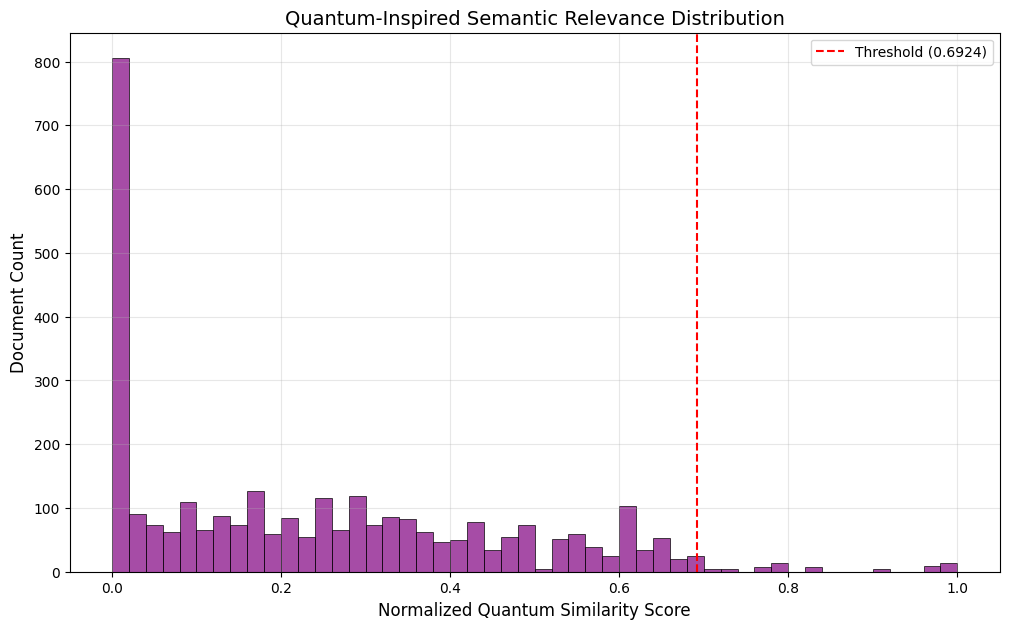


=== TOP 20 RELEVANT DOCUMENTS (Threshold: 0.6924) ===

#1 [Score: 1.0000]
Source: https://tiger-universe.com/blogs/tiger-blog/how-fast-can-a-jaguar-run-top-speeds-and-facts
Content Preview:
People often wonder: how fast can a jaguar run? Jaguars' speed shows their amazing hunting abilities. They can go up to 50 miles per hour , making them some of the fastest big cats. Measured in kilome...

Query Matching Breakdown:
 - Sub-query 1: 0.4248 (jaguar car top speed)
 - Sub-query 2: 0.5554 (jaguar animal running velocity)
 - Sub-query 3: 0.5813 (maximum speed of a jaguar in the wild)
 - Sub-query 4: 0.4067 (jaguar fighter jet speed)
 - Sub-query 5: 0.3363 (jaguar sports car acceleration)
 - Sub-query 6: 0.3805 (jaguar feline agility and reflexes)
 - Sub-query 7: 0.2416 (jaguar brand marketing and advertising reach)

Relevance Explanation:
This document was selected because:
- Shows strong alignment with sub-query #3 (58.13% match)
- Maintains good consistency across all sub-queries (geomet

In [ ]:
import matplotlib.pyplot as plt

def quantum_ripple_propagation(sub_queries, quantum_excitations, splits):
    print("\n=== INITIATING QUANTUM RIPPLE PROPAGATION ===")

    # 1. Quantum Encoding of Sub-Queries
    print(f"\nEncoding {len(sub_queries)} sub-queries into quantum states...")
    model = SentenceTransformer('all-MiniLM-L6-v2')

    # Generate query embeddings with same parameters as documents
    query_embeddings = model.encode(sub_queries,
                                   normalize_embeddings=True,
                                   convert_to_numpy=True)

    # Pad to 512 dimensions (same as document encoding)
    padded_queries = np.zeros((len(sub_queries), 512))
    padded_queries[:, :384] = query_embeddings
    complex_queries = padded_queries.astype(np.complex128)

    # Configure quantum encoder (mirroring document setup)
    dev = qml.device("default.qubit", wires=9)

    @qml.qnode(dev)
    def query_encoder(state):
        qml.AmplitudeEmbedding(features=state,
                             wires=range(9),
                             normalize=False)
        return qml.state()

    # Encode all sub-queries
    query_states = []
    for idx, query in enumerate(complex_queries):
        state = query_encoder(query)
        query_states.append(state)
        if idx < 2:  # Show first 2 sub-query states
            print(f"\nSub-query {idx+1} Quantum State:")
            print(f"Vector Norm: {np.linalg.norm(state):.4f}")
            print(f"First 5 Amplitudes: {state[:5]}")

    # 2. Quantum State Similarity Computation
    print("\nComputing Quantum State Overlaps...")

    # Convert to numpy arrays for vectorized computation
    doc_states = np.array(quantum_excitations)
    query_states = np.array(query_states)

    # Compute all pairwise overlaps using quantum mechanical inner product
    similarity_matrix = np.abs(doc_states @ query_states.T.conj())**2
    print(f"\nSimilarity Matrix Shape: {similarity_matrix.shape}")
    print("(Documents x Queries) dimensional relationship")

    # 3. Ripple Propagation Analysis
    print("\nApplying Ripple Propagation Dynamics:")
    aggregated_scores = np.prod(similarity_matrix, axis=1)**(1/len(sub_queries))
    max_score = np.max(aggregated_scores)
    normalized_scores = (aggregated_scores / max_score)**2

    print("\nScore Statistics:")
    print(f"Maximum Document Score: {np.max(normalized_scores):.4f}")
    print(f"Minimum Document Score: {np.min(normalized_scores):.4f}")
    print(f"95th Percentile: {np.percentile(normalized_scores, 95):.4f}")

    # 4. Relevance Thresholding
    quantum_fluctuation = np.std(normalized_scores)
    threshold = np.mean(normalized_scores) + 2*quantum_fluctuation
    print(f"\nAutomatic Relevance Threshold: {threshold:.4f}")

    # 5. Enhanced Results Visualization
    plt.figure(figsize=(12, 7))
    plt.hist(normalized_scores, bins=50, alpha=0.7, color='purple',
            edgecolor='black', linewidth=0.7)
    plt.axvline(threshold, color='red', linestyle='--',
                label=f'Threshold ({threshold:.4f})')
    plt.title("Quantum-Inspired Semantic Relevance Distribution", fontsize=14)
    plt.xlabel("Normalized Quantum Similarity Score", fontsize=12)
    plt.ylabel("Document Count", fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    # 6. Detailed Results Analysis with Metadata
    sorted_indices = np.argsort(normalized_scores)[::-1]
    print(f"\n=== TOP 20 RELEVANT DOCUMENTS (Threshold: {threshold:.4f}) ===")

    for i, idx in enumerate(sorted_indices[:20]):
        if normalized_scores[idx] < threshold:
            break

        doc = splits[idx]
        content_preview = (doc.page_content[:200] + '...') if len(doc.page_content) > 200 else doc.page_content
        source = doc.metadata.get('source', 'No source metadata available')

        print(f"\n#{i+1} [Score: {normalized_scores[idx]:.4f}]")
        print(f"Source: {source}")
        print(f"Content Preview:\n{content_preview}")

        # Show individual query matches
        print("\nQuery Matching Breakdown:")
        for q_idx, score in enumerate(similarity_matrix[idx]):
            print(f" - Sub-query {q_idx+1}: {score:.4f} ({sub_queries[q_idx].strip()})")

        # Explain relevance
        print("\nRelevance Explanation:")
        max_match = np.argmax(similarity_matrix[idx])
        print(f"This document was selected because:")
        print(f"- Shows strong alignment with sub-query #{max_match+1} ({similarity_matrix[idx][max_match]:.2%} match)")
        print(f"- Maintains good consistency across all sub-queries (geometric mean: {aggregated_scores[idx]:.4f})")
        print(f"- Contains key terms: {', '.join(doc.page_content.split()[:5])}...")
        print("-" * 80)

    print("\n=== QUANTUM RIPPLE PROPAGATION COMPLETE ===")
    return normalized_scores, threshold

# Example Execution
sub_queries = [
"jaguar car top speed",
"jaguar animal running velocity",
"maximum speed of a jaguar in the wild",
"jaguar fighter jet speed",
"jaguar sports car acceleration",
"jaguar feline agility and reflexes",
"jaguar brand marketing and advertising reach"

]




scores, threshold = quantum_ripple_propagation(sub_queries, quantum_excitations, splits)


=== INITIATING QUANTUM RIPPLE PROPAGATION ===

Encoding 7 sub-queries into quantum states...

Sub-query 1 Quantum State:
Vector Norm: 1.0000
First 5 Amplitudes: [-0.04209376+0.j  0.04263071+0.j -0.03664293+0.j -0.05908902+0.j
 -0.02731923+0.j]

Sub-query 2 Quantum State:
Vector Norm: 1.0000
First 5 Amplitudes: [-0.02007853+0.j  0.05939329+0.j -0.02085285+0.j -0.01332082+0.j
 -0.03774076+0.j]

Computing Quantum State Overlaps...

Similarity Matrix Shape: (3107, 7)

Applying Ripple Propagation Dynamics:

Score Statistics:
Maximum Document Score: 1.0000
Minimum Document Score: 0.0000
95th Percentile: 0.6407

Automatic Relevance Threshold: 0.6924


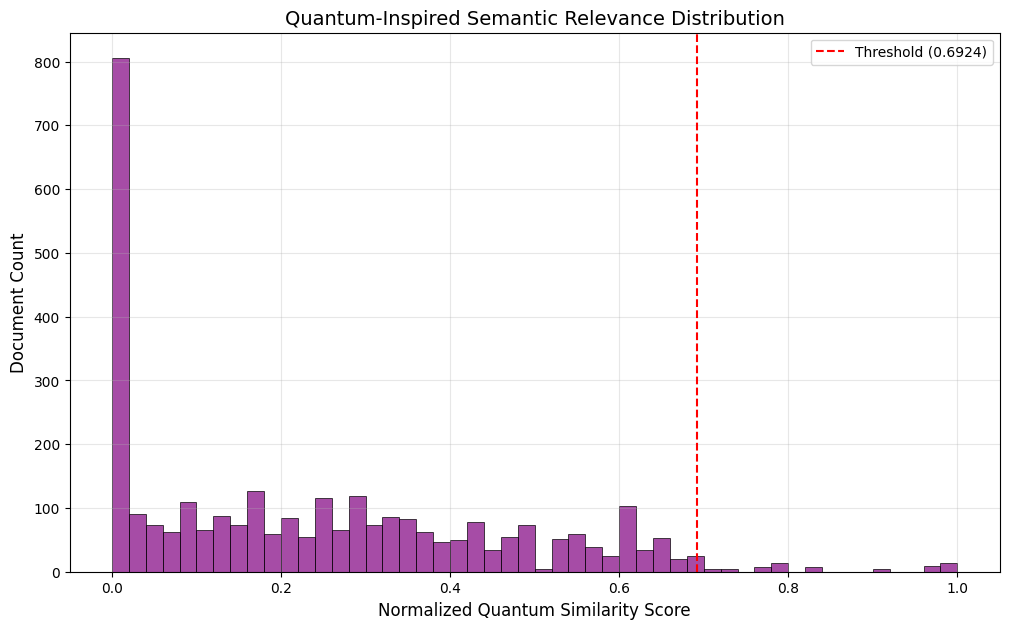


Processing unique sources...

=== TOP UNIQUE SOURCES (Threshold: 0.6924) ===

#1 [Score: 1.0000]
Source: https://tiger-universe.com/blogs/tiger-blog/how-fast-can-a-jaguar-run-top-speeds-and-facts
Content Preview:
People often wonder: how fast can a jaguar run? Jaguars' speed shows their amazing hunting abilities. They can go up to 50 miles per hour , making them some of the fastest big cats. Measured in kilome...

Query Matching Breakdown:
 - Sub-query 1: 0.4248 (jaguar car top speed)
 - Sub-query 2: 0.5554 (jaguar animal running velocity)
 - Sub-query 3: 0.5813 (maximum speed of a jaguar in the wild)
 - Sub-query 4: 0.4067 (jaguar fighter jet speed)
 - Sub-query 5: 0.3363 (jaguar sports car acceleration)
 - Sub-query 6: 0.3805 (jaguar feline agility and reflexes)
 - Sub-query 7: 0.2416 (jaguar brand marketing and advertising reach)

Relevance Explanation:
This document was selected because:
- Strongest match with sub-query #3 (58.13%)
- Content includes key terms: People, often, wond

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pennylane as qml
from sentence_transformers import SentenceTransformer

def quantum_ripple_propagation(sub_queries, quantum_excitations, splits):
    print("\n=== INITIATING QUANTUM RIPPLE PROPAGATION ===")

    # 1. Quantum Encoding of Sub-Queries
    print(f"\nEncoding {len(sub_queries)} sub-queries into quantum states...")
    model = SentenceTransformer('all-MiniLM-L6-v2')

    # Generate query embeddings
    query_embeddings = model.encode(sub_queries,
                                   normalize_embeddings=True,
                                   convert_to_numpy=True)

    # Pad to 512 dimensions
    padded_queries = np.zeros((len(sub_queries), 512))
    padded_queries[:, :384] = query_embeddings
    complex_queries = padded_queries.astype(np.complex128)

    # Configure quantum encoder
    dev = qml.device("default.qubit", wires=9)

    @qml.qnode(dev)
    def query_encoder(state):
        qml.AmplitudeEmbedding(features=state,
                             wires=range(9),
                             normalize=False)
        return qml.state()

    # Encode all sub-queries
    query_states = []
    for idx, query in enumerate(complex_queries):
        state = query_encoder(query)
        query_states.append(state)
        if idx < 2:
            print(f"\nSub-query {idx+1} Quantum State:")
            print(f"Vector Norm: {np.linalg.norm(state):.4f}")
            print(f"First 5 Amplitudes: {state[:5]}")

    # 2. Quantum State Similarity Computation
    print("\nComputing Quantum State Overlaps...")

    # Convert to numpy arrays
    doc_states = np.array(quantum_excitations)
    query_states = np.array(query_states)

    # Compute similarity matrix
    similarity_matrix = np.abs(doc_states @ query_states.T.conj())**2
    print(f"\nSimilarity Matrix Shape: {similarity_matrix.shape}")

    # 3. Ripple Propagation Analysis
    print("\nApplying Ripple Propagation Dynamics:")
    aggregated_scores = np.prod(similarity_matrix, axis=1)**(1/len(sub_queries))
    max_score = np.max(aggregated_scores)
    normalized_scores = (aggregated_scores / max_score)**2

    print("\nScore Statistics:")
    print(f"Maximum Document Score: {np.max(normalized_scores):.4f}")
    print(f"Minimum Document Score: {np.min(normalized_scores):.4f}")
    print(f"95th Percentile: {np.percentile(normalized_scores, 95):.4f}")

    # 4. Relevance Thresholding
    quantum_fluctuation = np.std(normalized_scores)
    threshold = np.mean(normalized_scores) + 2*quantum_fluctuation
    print(f"\nAutomatic Relevance Threshold: {threshold:.4f}")

    # 5. Enhanced Results Visualization
    plt.figure(figsize=(12, 7))
    plt.hist(normalized_scores, bins=50, alpha=0.7, color='purple',
            edgecolor='black', linewidth=0.7)
    plt.axvline(threshold, color='red', linestyle='--',
                label=f'Threshold ({threshold:.4f})')
    plt.title("Quantum-Inspired Semantic Relevance Distribution", fontsize=14)
    plt.xlabel("Normalized Quantum Similarity Score", fontsize=12)
    plt.ylabel("Document Count", fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    # 6. Unique Source Processing
    print("\nProcessing unique sources...")
    source_data = {}

    # Group documents by source URL
    for idx, doc in enumerate(splits):
        source = doc.metadata.get('source', 'Unknown')
        score = normalized_scores[idx]

        # Track best document for each source
        if source not in source_data or score > source_data[source]['score']:
            source_data[source] = {
                'score': score,
                'index': idx,
                'content': doc.page_content,
                'metadata': doc.metadata
            }

    # Create sorted list of unique sources
    unique_sources = sorted(
        source_data.values(),
        key=lambda x: x['score'],
        reverse=True
    )

    # 7. Display Unique Results
    print(f"\n=== TOP UNIQUE SOURCES (Threshold: {threshold:.4f}) ===")
    displayed_count = 0

    for i, source_info in enumerate(unique_sources):
        if displayed_count >= 20:
            break
        if source_info['score'] < threshold:
            continue

        idx = source_info['index']
        doc = splits[idx]
        content_preview = (doc.page_content[:200] + '...') if len(doc.page_content) > 200 else doc.page_content

        print(f"\n#{displayed_count+1} [Score: {source_info['score']:.4f}]")
        print(f"Source: {doc.metadata.get('source', 'Unknown')}")
        print(f"Content Preview:\n{content_preview}")

        # Show individual query matches
        print("\nQuery Matching Breakdown:")
        for q_idx, score in enumerate(similarity_matrix[idx]):
            print(f" - Sub-query {q_idx+1}: {score:.4f} ({sub_queries[q_idx].strip()})")

        # Explain relevance
        print("\nRelevance Explanation:")
        max_match = np.argmax(similarity_matrix[idx])
        print(f"This document was selected because:")
        print(f"- Strongest match with sub-query #{max_match+1} ({similarity_matrix[idx][max_match]:.2%})")
        print(f"- Content includes key terms: {', '.join(doc.page_content.split()[:5])}...")
        print("-" * 80)

        displayed_count += 1

    print(f"\nDisplayed {displayed_count} unique sources above threshold")
    print("\n=== QUANTUM RIPPLE PROPAGATION COMPLETE ===")

    return normalized_scores, threshold

# Example Execution
sub_queries = [
    "jaguar car top speed",
    "jaguar animal running velocity",
    "maximum speed of a jaguar in the wild",
    "jaguar fighter jet speed",
    "jaguar sports car acceleration",
    "jaguar feline agility and reflexes",
    "jaguar brand marketing and advertising reach"
]

scores, threshold = quantum_ripple_propagation(sub_queries, quantum_excitations, splits)


=== SEMANTIC DENSITY INDEX CALCULATION ===
Calculating Quantum SDI...
Calculating BERT SDI...
Calculating TF-IDF SDI...
Calculating Linguistic SDI...

=== SDI STATISTICAL SUMMARY ===

QUANTUM SDI:
 - Average: 375.1
 - Std Dev: 2.5
 - Max: 381
 - Min: 367

BERT SDI:
 - Average: 39.0
 - Std Dev: 0.0
 - Max: 39
 - Min: 39

TFIDF SDI:
 - Average: 101.6
 - Std Dev: 37.1
 - Max: 156
 - Min: 2

LINGUISTIC SDI:
 - Average: 47.4
 - Std Dev: 17.3
 - Max: 88
 - Min: 1


<ipython-input-22-c04b599185dd>:63: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data, patch_artist=True, labels=methods,


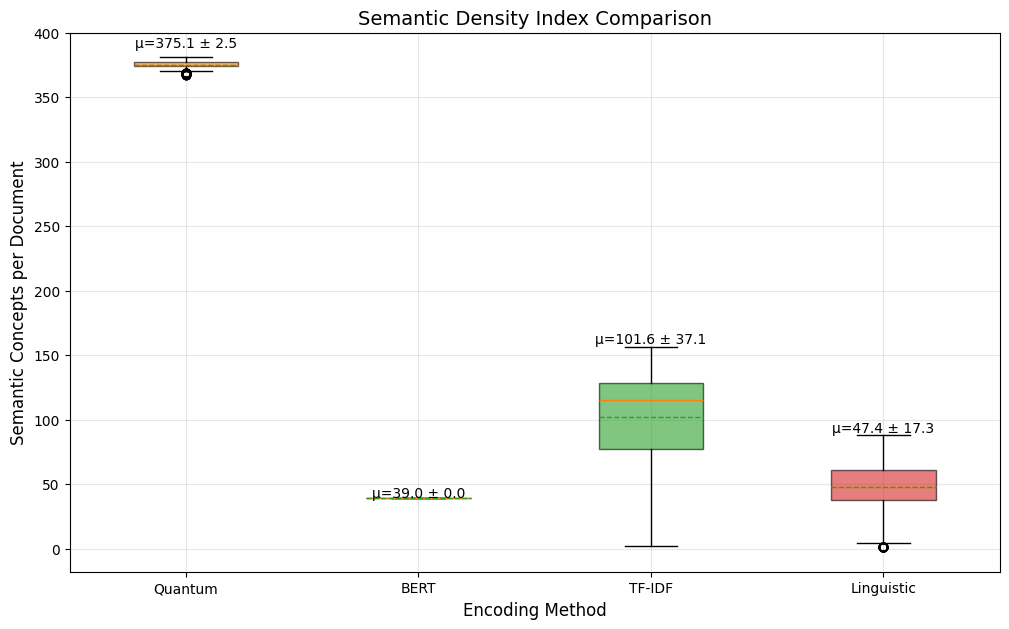

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sentence_transformers import SentenceTransformer
import spacy

def calculate_sdi(splits, quantum_excitations):
    """Calculate Semantic Density Index for both quantum and traditional methods"""
    print("\n=== SEMANTIC DENSITY INDEX CALCULATION ===")

    # Extract document texts
    documents = [doc.page_content for doc in splits]

    # 1. Quantum SDI Calculation
    print("Calculating Quantum SDI...")
    quantum_sdi = []
    for state in quantum_excitations:
        # Measure non-zero amplitude components above noise floor
        significant_components = np.sum(np.abs(state) > 1e-3)
        quantum_sdi.append(significant_components)

    # 2. BERT SDI Calculation
    print("Calculating BERT SDI...")
    bert_model = SentenceTransformer('all-MiniLM-L6-v2')
    bert_embeddings = bert_model.encode(documents)
    bert_sdi = []
    for emb in bert_embeddings:
        # Count dimensions with significant activation
        bert_sdi.append(np.sum(np.abs(emb) > np.percentile(np.abs(emb), 90)))

    # 3. TF-IDF SDI Calculation
    print("Calculating TF-IDF SDI...")
    tfidf = TfidfVectorizer(max_features=5000)
    tfidf_matrix = tfidf.fit_transform(documents)
    tfidf_sdi = tfidf_matrix.getnnz(axis=1)

    # 4. SpaCy-based Semantic Count
    print("Calculating Linguistic SDI...")
    nlp = spacy.load("en_core_web_sm")
    linguistic_sdi = []
    for doc in nlp.pipe(documents, disable=["parser"]):
        # Count unique semantic entities and noun phrases
        entities = len(set([ent.text.lower() for ent in doc.ents]))
        nouns = len(set([token.text.lower() for token in doc if token.pos_ == "NOUN"]))
        linguistic_sdi.append(entities + nouns)

    return {
        'quantum': np.array(quantum_sdi),
        'bert': np.array(bert_sdi),
        'tfidf': np.array(tfidf_sdi),
        'linguistic': np.array(linguistic_sdi)
    }

def visualize_sdi_comparison(sdi_results):
    """Visualize SDI comparison across different methods"""
    plt.figure(figsize=(12, 7))

    methods = ['Quantum', 'BERT', 'TF-IDF', 'Linguistic']
    data = [sdi_results['quantum'], sdi_results['bert'],
            sdi_results['tfidf'], sdi_results['linguistic']]

    # Boxplot configuration
    box = plt.boxplot(data, patch_artist=True, labels=methods,
                     showmeans=True, meanline=True)

    # Color configuration
    colors = ['#ff7f0e', '#1f77b4', '#2ca02c', '#d62728']
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.6)

    plt.title("Semantic Density Index Comparison", fontsize=14)
    plt.ylabel("Semantic Concepts per Document", fontsize=12)
    plt.xlabel("Encoding Method", fontsize=12)
    plt.grid(True, alpha=0.3)

    # Add statistical annotations
    for i, method in enumerate(methods):
        plt.text(i+1, np.max(data[i])*1.02,
                f"μ={np.mean(data[i]):.1f} ± {np.std(data[i]):.1f}",
                ha='center', fontsize=10)

    plt.show()

def perform_sdi_analysis(splits, quantum_excitations):
    """Full SDI analysis workflow"""
    # Calculate SDI metrics
    sdi_results = calculate_sdi(splits, quantum_excitations)

    # Print statistical summary
    print("\n=== SDI STATISTICAL SUMMARY ===")
    for method, values in sdi_results.items():
        print(f"\n{method.upper()} SDI:")
        print(f" - Average: {np.mean(values):.1f}")
        print(f" - Std Dev: {np.std(values):.1f}")
        print(f" - Max: {np.max(values)}")
        print(f" - Min: {np.min(values)}")

    # Visual comparison
    visualize_sdi_comparison(sdi_results)

    return sdi_results

# Usage example (add to your existing code)
sdi_results = perform_sdi_analysis(splits, quantum_excitations)